In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# plots show in the notebook
%matplotlib inline

# additional configuration (optional)
plt.rcParams['figure.figsize'] = 12, 6
%config InlineBackend.figure_format = 'retina'

In [3]:
ds_cm4_static = xr.open_dataset('/net/Rebecca.Beadling/subtropical_gyres/mode_water/ocean_monthly.static.nc')
ds_cm4_fwf = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwater_output/ocean_monthly.000101-000512.prcme_adj.nc')

ds_cm4_static

<xarray.Dataset>
Dimensions:       (xh: 1440, xq: 1440, yh: 1080, yq: 1080)
Coordinates:
  * xh            (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * xq            (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yh            (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * yq            (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
Data variables:
    geolat        (yh, xh) float32 ...
    geolat_c      (yq, xq) float32 ...
    geolon        (yh, xh) float32 ...
    geolon_c      (yq, xq) float32 ...
    Coriolis      (yq, xq) float32 ...
    areacello     (yh, xh) float32 ...
    areacello_bu  (yq, xq) float32 ...
    areacello_cu  (yh, xq) float32 ...
    areacello_cv  (yq, xh) float32 ...
    deptho        (yh, xh) float32 ...
    dxCu          (yh, xq) float32 ...
    dxCv          (yq, xh) float32 ...
    dxt           (yh, xh) float32 ...
    dyCu          (yh, xq) float32 ...
    dyCv          (yq, xh) float32 ...
    dyt           (yh, xh) float32 ...
    geolat_u      (yh, xq) float32 ...
    geolat_v      (yq, xh) float32 ...
    geolon_u      (yh, xq) float32 ...
    geolon_v      (yq, xh) float32 ...
    hfgeou        (yh, xh) float32 ...
    sftof         (yh, xh) float32 ...
    wet           (yh, xh) float32 ...
    wet_c         (yq, xq) float32 ...
    wet_u         (yh, xq) float32 ...
    wet_v         (yq, xh) float32 ...
    basin         (yh, xh) int32 ...
Attributes:
    external_variables:  areacello areacello

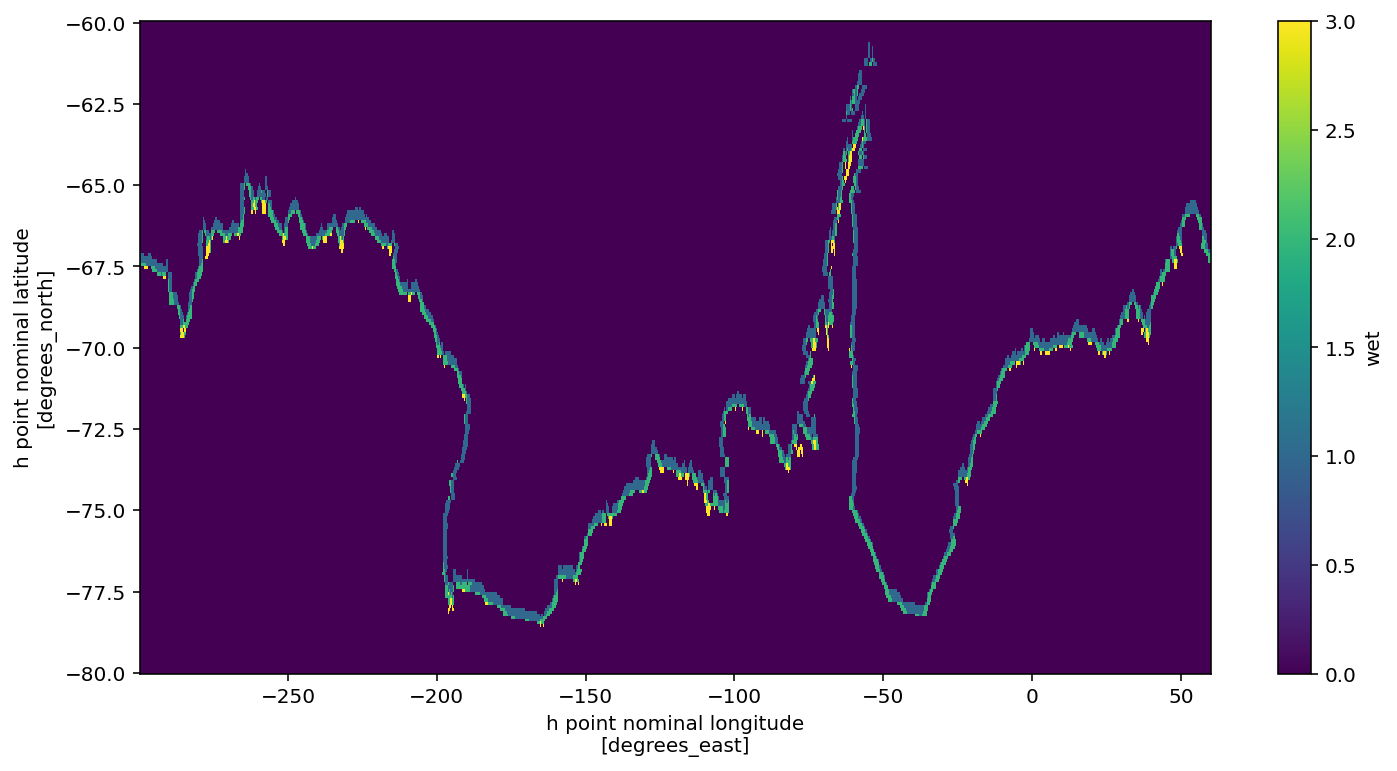

In [110]:
wet_mask = ds_cm4_static.wet

land = wet_mask.where(wet_mask==0)
ocean = wet_mask.where(wet_mask==1)
ocean_zero = ocean*0

land_ones = ocean_zero.where(ocean_zero==0,1)
land = land_ones.where(land_ones==1)

#select only region south of 60S to perform ffill on
forward_fill_land_y = land.sel(yh=slice(-80,-60)).ffill(dim='yh',limit=4)
forward_fill_land_x = land.sel(yh=slice(-80,-60)).ffill(dim='xh',limit=6)
backward_fill_land_x = land.sel(yh=slice(-80,-60)).bfill(dim='xh',limit=6)

fill_wet_y = forward_fill_land_y*wet_mask
fill_wet_x = forward_fill_land_x*wet_mask
bfill_wet_x = backward_fill_land_x*wet_mask

coast_mask_y = fill_wet_y.fillna(0)
coast_mask_x = fill_wet_x.fillna(0)
coast_mask_bfillx = bfill_wet_x.fillna(0)

total = coast_mask_y + coast_mask_x + coast_mask_bfillx

total.plot()

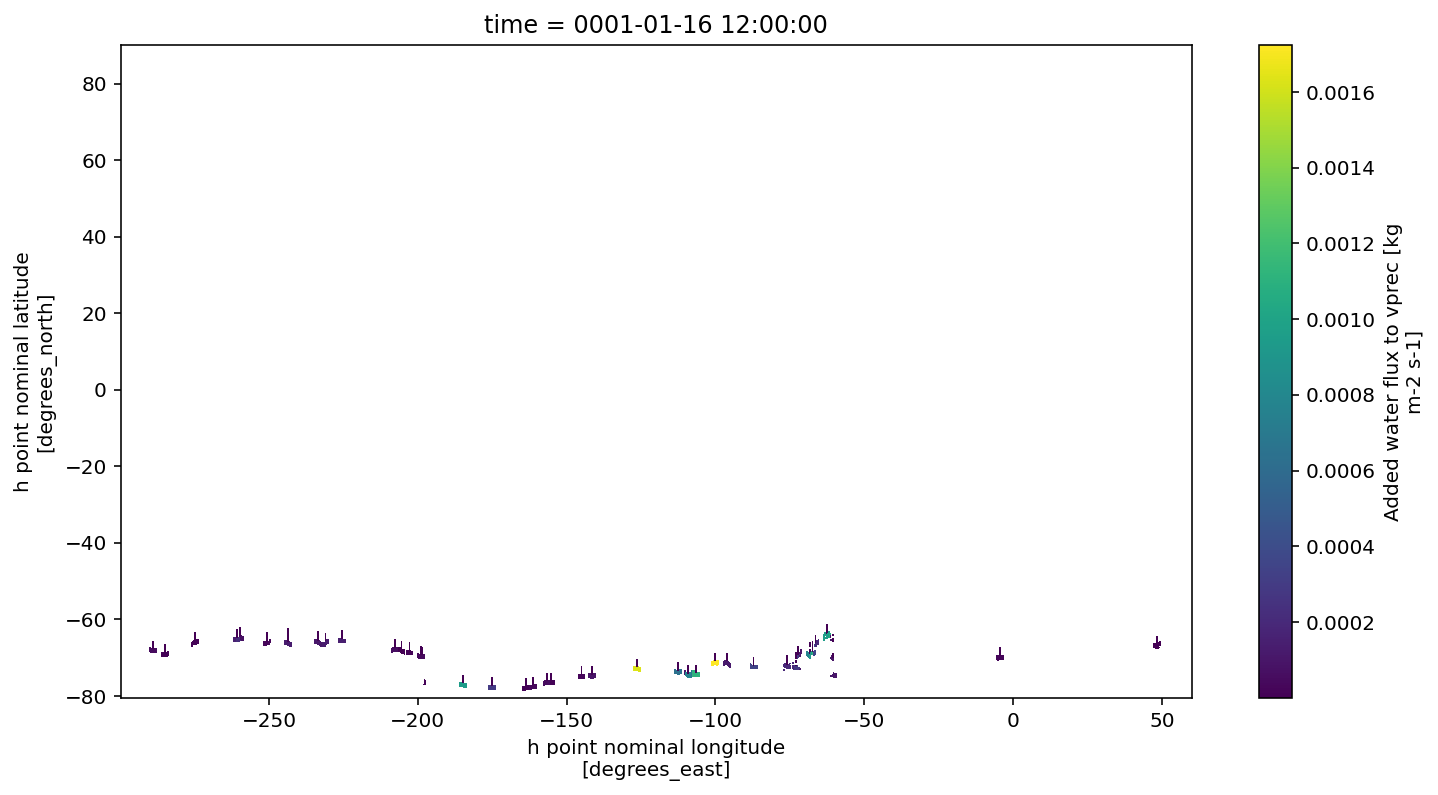

In [35]:
fwf = ds_cm4_fwf.prcme_adj.isel(time=0)
fwf = fwf.where(fwf>0)
fwf.plot()